In [1]:
import pandas as pd

In [13]:
df_1 = pd.read_csv("../data/clustering/clustering_1.csv", sep="\t", header=None)
df_2 = pd.read_csv("../data/clustering/clustering_2.csv", sep="\t", header=None)
df_3 = pd.read_csv("../data/clustering/clustering_3.csv", sep="\t", header=None)

dfs = [df_1, df_2, df_3]

In [14]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

scaled_df_1 = scaler.fit_transform(df_1)
scaled_df_2 = scaler.fit_transform(df_2)
scaled_df_3 = scaler.fit_transform(df_3)

scaled_dfs = [scaled_df_1, scaled_df_2, scaled_df_3]

In [19]:
import matplotlib.pyplot as plt

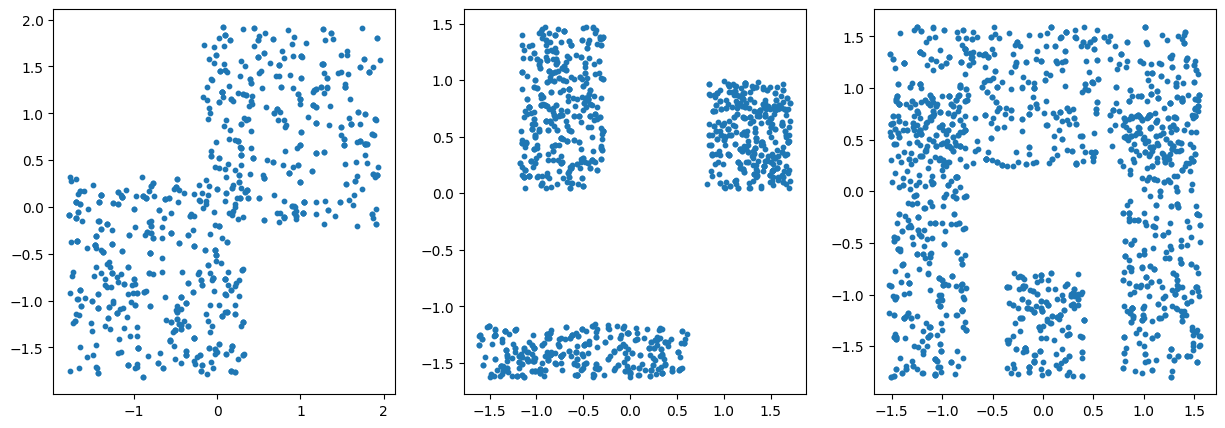

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(scaled_df_1[:, 0], scaled_df_1[:, 1], s=10)
axes[1].scatter(scaled_df_2[:, 0], scaled_df_2[:, 1], s=10)
axes[2].scatter(scaled_df_3[:, 0], scaled_df_3[:, 1], s=10)
plt.show();

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
def find_optimal_k(data, max_k=10):
    inertias = []
    silhouettes = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(data, labels))
    return inertias, silhouettes

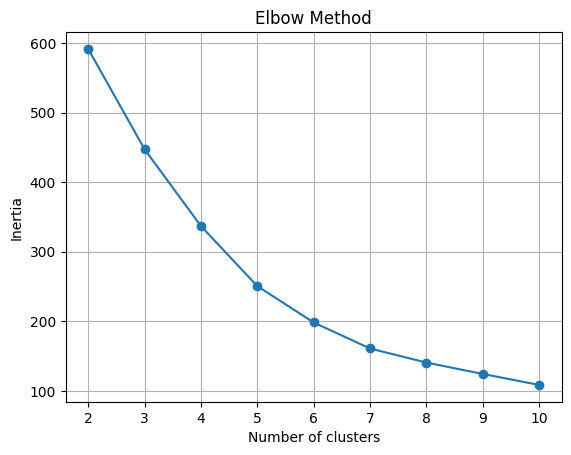

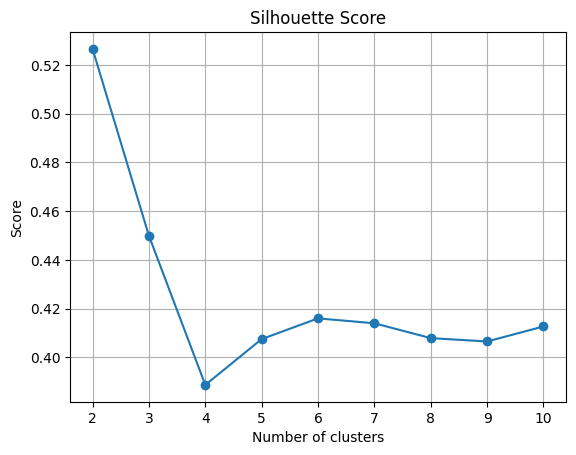

In [26]:
inertias, silhouettes = find_optimal_k(scaled_df_1)
plt.plot(range(2, 11), inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

plt.plot(range(2, 11), silhouettes, marker="o")
plt.title("Silhouette Score")
plt.xlabel("Number of clusters")
plt.grid(True)
plt.ylabel("Score")
plt.show()

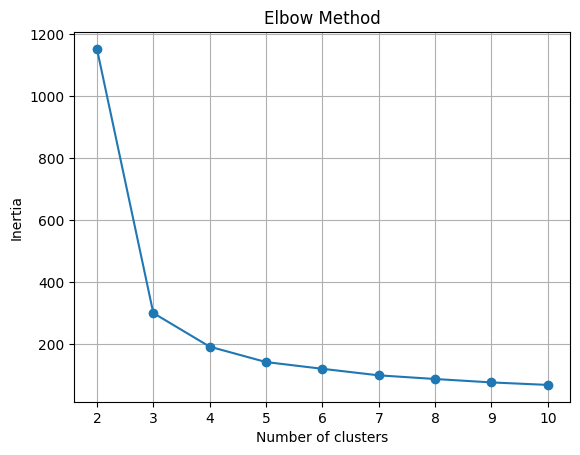

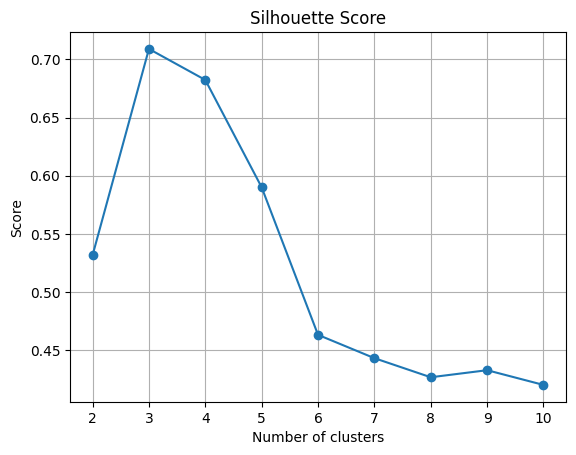

In [27]:
inertias, silhouettes = find_optimal_k(scaled_df_2)
plt.plot(range(2, 11), inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

plt.plot(range(2, 11), silhouettes, marker="o")
plt.title("Silhouette Score")
plt.xlabel("Number of clusters")
plt.grid(True)
plt.ylabel("Score")
plt.show()

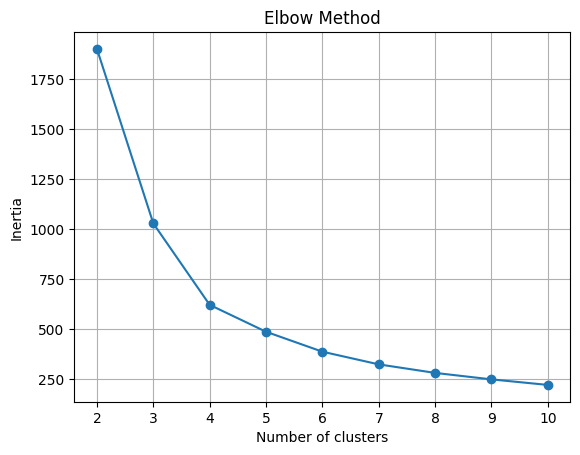

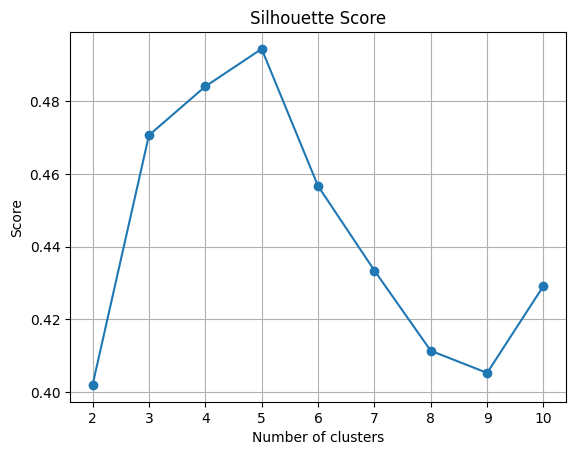

In [28]:
inertias, silhouettes = find_optimal_k(scaled_df_3)
plt.plot(range(2, 11), inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

plt.plot(range(2, 11), silhouettes, marker="o")
plt.title("Silhouette Score")
plt.xlabel("Number of clusters")
plt.grid(True)
plt.ylabel("Score")
plt.show()

In [33]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

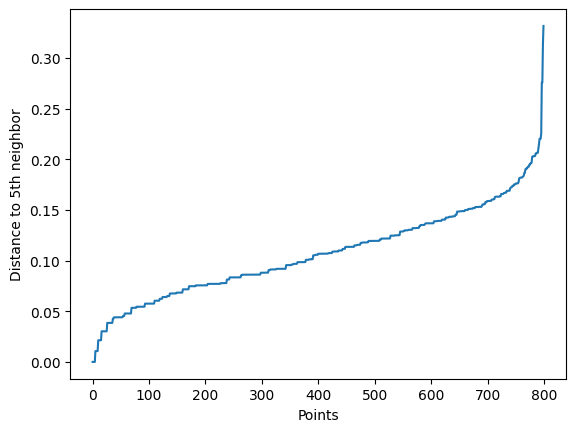

In [34]:
nn = NearestNeighbors(n_neighbors=5).fit(scaled_df_1)
distances, _ = nn.kneighbors(scaled_df_1)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance to 5th neighbor")
plt.show()

In [36]:
dbscan = DBSCAN(eps=0.25, min_samples=5)
labels_dbscan = dbscan.fit_predict(scaled_df_1)